![Image One](One.png)


**_The key to success in any organization is attracting and retaining top talent. This analysis is useful for an HR Analyst as its task is to determine which factors keep employees at the company and which prompt others to leave. By knowing these factors the HR analyst can change to prevent the loss of good people._**

<div style="text-align: center; background-color: #856ff8; padding: 10px;">
    <h2 style="font-weight: bold;">OUTLINE</h2>
</div>

- Importing Various Modules
- Loading Dataset
- Data Wrangling
    - Computing the size of DataFrame
    - Enlist the Column Labels
    - Clean column names by replacing non-alphanumeric characters with underscores (if necessary)
    - Handle class imbalance with SMOTE
    - Apply SMOTE to balance the dataset
    - Create a new DataFrame with the balanced data and save the balanced dataset
- Loading new Dataset
- Data Wrangling
    - Computing the size of DataFrame
    - Clean column names by replacing non-alphanumeric characters with underscores (if necessary)
    - Separate the features (X) and the target variable (y)
    - Encode categorical features into numerical values
    - Encode the target variable into numerical values (0 and 1)
    - Split the data into training (75%) and testing (25%) sets and scale the features
    - Define the classifiers,train and evaluate each classifier
- Display all the accuracy results

<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">Importing Various Modules</h2>
</div>

In [1]:
# Library for Data Manipulation
import numpy as np
import pandas as pd

#Library for Data Visualization.
import seaborn as sns
import matplotlib.pyplot as plt
import hvplot
import re
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# Library for Statistical Modelling
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve, auc
from imblearn.over_sampling import SMOTE


# Library for Ignore the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">Loading Dataset</h2>
</div>

In [2]:
# Load the data
dff = pd.read_csv('IBM-HR-Analytics-Employee-Attrition-and-Performance.csv')

<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">Data Wrangling</h2>
</div>

## <span style='color:blue'> 1] Computing size of dataset </span>

In [3]:
# Print the shape of the DataFrame
print("The shape of data frame:", dff.shape)
# Print the length (number of rows) of the DataFrame
print("Number of Rows in the dataframe:", len(dff))
# Print the number of columns in the DataFrame
print("Number of Columns in the dataframe:", len(dff.columns))

The shape of data frame: (1470, 35)
Number of Rows in the dataframe: 1470
Number of Columns in the dataframe: 35


## <span style='color:blue'> 2] Clean column names by replacing non-alphanumeric characters with underscores (if necessary) </span>

In [4]:
new_columns = [re.sub(r'\W', '_', col) for col in dff.columns]
dff.columns = new_columns

## <span style='color:blue'> 3] Handle class imbalance with SMOTE </span>

In [5]:
# Separate the features (X) and the target variable (y)
X = dff.drop('Attrition', axis=1)
y = dff['Attrition']

# Encode categorical features into numerical values
label_encoder = LabelEncoder()
cat_cols = X.select_dtypes(include=['object']).columns
for col in cat_cols:
    X[col] = label_encoder.fit_transform(X[col])

## <span style='color:blue'> 4] Apply SMOTE to balance the dataset </span>

In [6]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

## <span style='color:blue'> 5] Create a new DataFrame with the balanced data and save the balanced dataset </span>

In [7]:
df_balanced = pd.DataFrame(X_smote, columns=X.columns)
df_balanced['Attrition'] = y_smote

df_balanced.to_csv('final_balanced.csv', index=False)

<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">Loading new dataset</h2>
</div>

In [8]:
df = pd.read_csv('final_balanced.csv')

<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">Data Wrangling</h2>
</div>

## <span style='color:blue'> 1] Computing size of dataset </span>

In [9]:
# Print the shape of the DataFrame
print("The shape of data frame:", df.shape)
# Print the length (number of rows) of the DataFrame
print("Number of Rows in the dataframe:", len(df))
# Print the number of columns in the DataFrame
print("Number of Columns in the dataframe:", len(df.columns))

The shape of data frame: (2466, 35)
Number of Rows in the dataframe: 2466
Number of Columns in the dataframe: 35


## <span style='color:blue'> 2] Clean column names by replacing non-alphanumeric characters with underscores (if necessary) </span>

In [10]:
new_columns = [re.sub(r'\W', '_', col) for col in df_balanced.columns]
df_balanced.columns = new_columns

## <span style='color:blue'> 3] Separate the features (X) and the target variable (y) </span>

In [11]:
X = df_balanced.drop('Attrition', axis=1)
y = df_balanced['Attrition']

## <span style='color:blue'> 4] Encode categorical features into numerical values </span>

In [12]:
label_encoder = LabelEncoder()
cat_cols = X.select_dtypes(include=['object']).columns
for col in cat_cols:
    X[col] = label_encoder.fit_transform(X[col])

## <span style='color:blue'> 5] Encode the target variable into numerical values (0 and 1) </span>

In [13]:
#This encodes 'No' to 0 and 'Yes' to 1
y = label_encoder.fit_transform(y)

## <span style='color:blue'> 6] Split the data into training (75%) and testing (25%) sets and scale the features </span>

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## <span style='color:blue'> 7] Define the classifiers,train and evaluate each classifier </span>

In [15]:
classifiers = {
    'XGBoost': XGBClassifier(),
    'Random Forest': RandomForestClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0)
}

# Dictionary to store the results of each classifier
results = {}

# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    try:
        # Train the classifier on the scaled training data
        clf.fit(X_train_scaled, y_train)
        
        # Predict probabilities for positive class
        y_scores = clf.predict_proba(X_test_scaled)[:, 1]
        
        # Compute precision, recall and thresholds for precision-recall curve
        precisions, recalls, thresholds_pr = precision_recall_curve(y_test, y_scores)
        
        # Compute fpr, tpr and thresholds for ROC curve
        fpr, tpr, thresholds_roc = roc_curve(y_test, y_scores)
        
        # Compute AUC for ROC curve
        roc_auc = auc(fpr, tpr)
        
        # Calculate accuracy
        y_pred = clf.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        
        # Store results
        results[clf_name] = {
            'Precision_Recall_Curve': {
                'Thresholds': thresholds_pr,
                'Precisions': precisions,
                'Recalls': recalls
            },
            'ROC_Curve': {
                'FPR': fpr,
                'TPR': tpr,
                'AUC': roc_auc
            },
            'Accuracy': accuracy
        }
        
    except Exception as e:
        # Print any error that occurs during training or prediction
        print(f'Error with {clf_name}: {e}')

<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">Display all the accuracy results</h2>
</div>

In [16]:
from tabulate import tabulate


table_data = []
for clf_name, result in results.items():
    table_data.append([clf_name, result['Accuracy']*100])

# Print results in tabular form
headers = ["Classifier", "Accuracy"]
print(tabulate(table_data, headers=headers, tablefmt="grid"))

+---------------+------------+
| Classifier    |   Accuracy |
+===============+============+
| XGBoost       |    92.3825 |
+---------------+------------+
| Random Forest |    91.248  |
+---------------+------------+
| CatBoost      |    91.41   |
+---------------+------------+


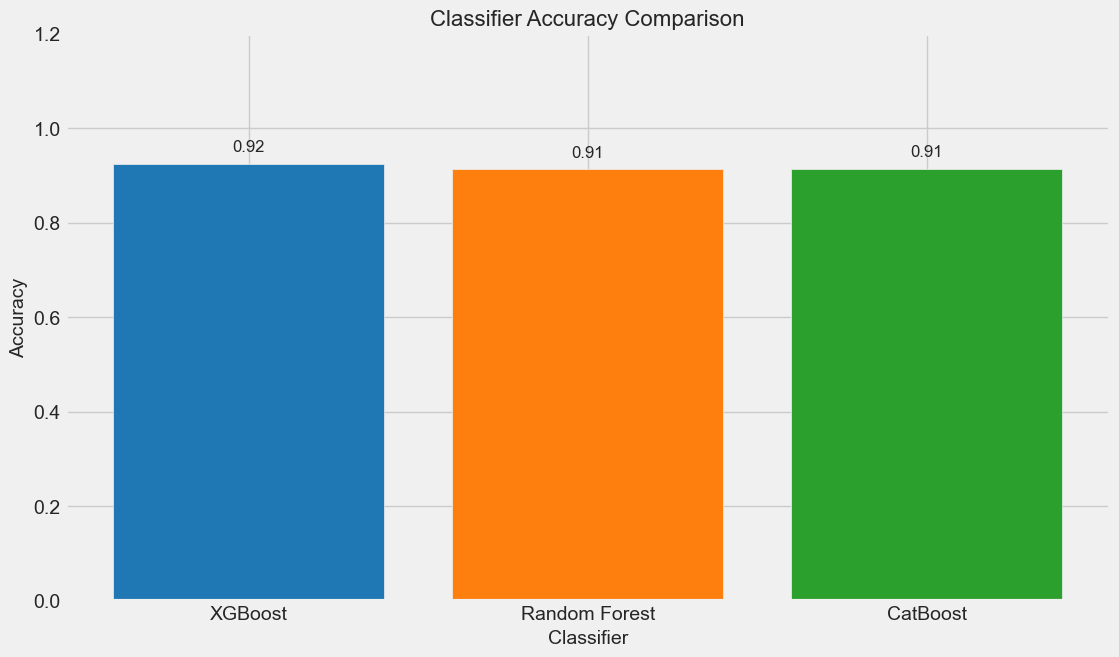

In [17]:
# Plot bar graph for accuracies
plt.figure(figsize=(12, 7))
classifier_names = list(results.keys())
accuracies = [results[clf_name]['Accuracy'] for clf_name in classifier_names]

bars = plt.bar(classifier_names, accuracies, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.xlabel('Classifier', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Classifier Accuracy Comparison', fontsize=16)
plt.ylim(0, 1.2)

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.2f}', ha='center', va='bottom', fontsize=12)

plt.show()

<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">Precision-Recall vs Threshold curve and ROC Curve</h2>
</div>

## <span style='color:blue'> 1] XGBoost Classifier </span>

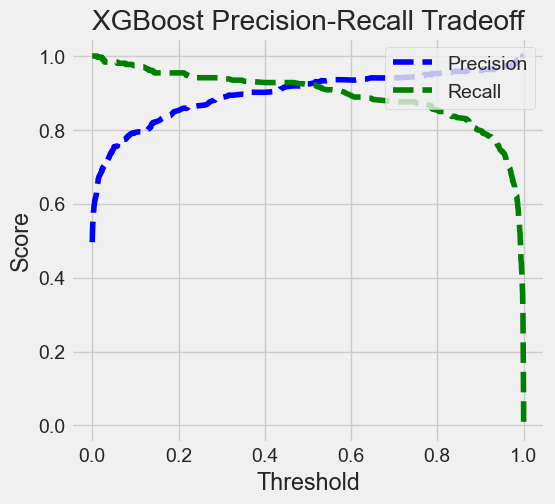

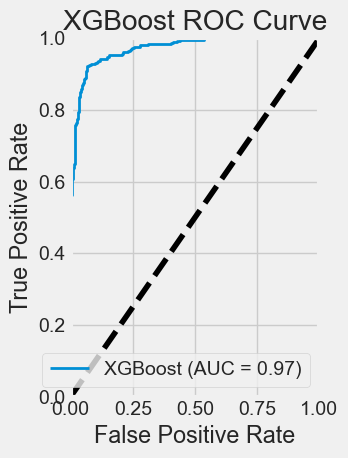

In [18]:
clf_name = 'XGBoost'
clf_results = results[clf_name]

# Precision-Recall Curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(clf_results['Precision_Recall_Curve']['Thresholds'], clf_results['Precision_Recall_Curve']['Precisions'][:-1], "b--", label="Precision")
plt.plot(clf_results['Precision_Recall_Curve']['Thresholds'], clf_results['Precision_Recall_Curve']['Recalls'][:-1], "g--", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend(loc="upper right")
plt.title(f'{clf_name} Precision-Recall Tradeoff')
plt.show()

# ROC Curve
plt.subplot(1, 2, 2)
fpr = clf_results['ROC_Curve']['FPR']
tpr = clf_results['ROC_Curve']['TPR']
roc_auc = clf_results['ROC_Curve']['AUC']
plt.plot(fpr, tpr, linewidth=2, label=f'{clf_name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], "k--")
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'{clf_name} ROC Curve')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

## <span style='color:blue'> 2] Random Forest Classifier </span>

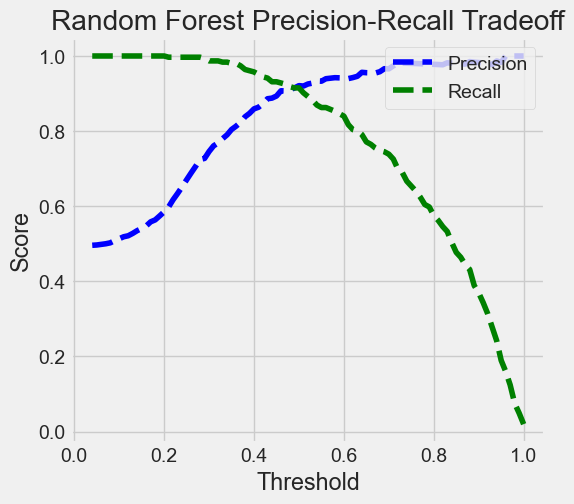

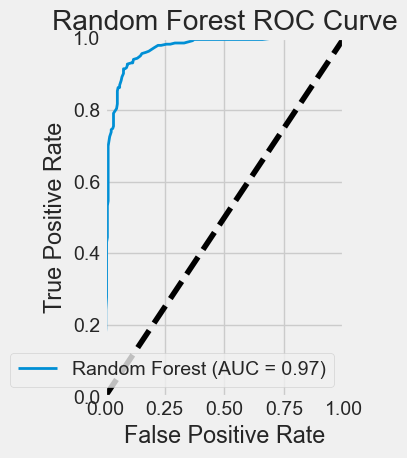

In [19]:
clf_name = 'Random Forest'
clf_results = results[clf_name]

# Precision-Recall Curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(clf_results['Precision_Recall_Curve']['Thresholds'], clf_results['Precision_Recall_Curve']['Precisions'][:-1], "b--", label="Precision")
plt.plot(clf_results['Precision_Recall_Curve']['Thresholds'], clf_results['Precision_Recall_Curve']['Recalls'][:-1], "g--", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend(loc="upper right")
plt.title(f'{clf_name} Precision-Recall Tradeoff')
plt.show()

# ROC Curve
plt.subplot(1, 2, 2)
fpr = clf_results['ROC_Curve']['FPR']
tpr = clf_results['ROC_Curve']['TPR']
roc_auc = clf_results['ROC_Curve']['AUC']
plt.plot(fpr, tpr, linewidth=2, label=f'{clf_name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], "k--")
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'{clf_name} ROC Curve')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


## <span style='color:blue'> 3] CatBoost Classifier </span>

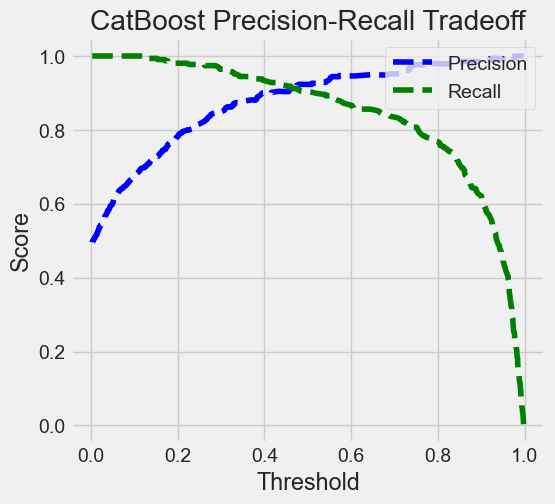

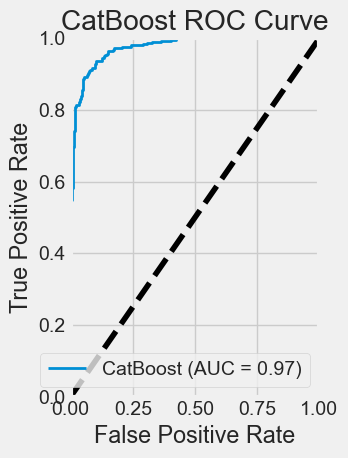

In [20]:
clf_name = 'CatBoost'
clf_results = results[clf_name]

# Precision-Recall Curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(clf_results['Precision_Recall_Curve']['Thresholds'], clf_results['Precision_Recall_Curve']['Precisions'][:-1], "b--", label="Precision")
plt.plot(clf_results['Precision_Recall_Curve']['Thresholds'], clf_results['Precision_Recall_Curve']['Recalls'][:-1], "g--", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend(loc="upper right")
plt.title(f'{clf_name} Precision-Recall Tradeoff')
plt.show()

# ROC Curve
plt.subplot(1, 2, 2)
fpr = clf_results['ROC_Curve']['FPR']
tpr = clf_results['ROC_Curve']['TPR']
roc_auc = clf_results['ROC_Curve']['AUC']
plt.plot(fpr, tpr, linewidth=2, label=f'{clf_name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], "k--")
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'{clf_name} ROC Curve')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">Comparing Model Performance</h2>
</div>

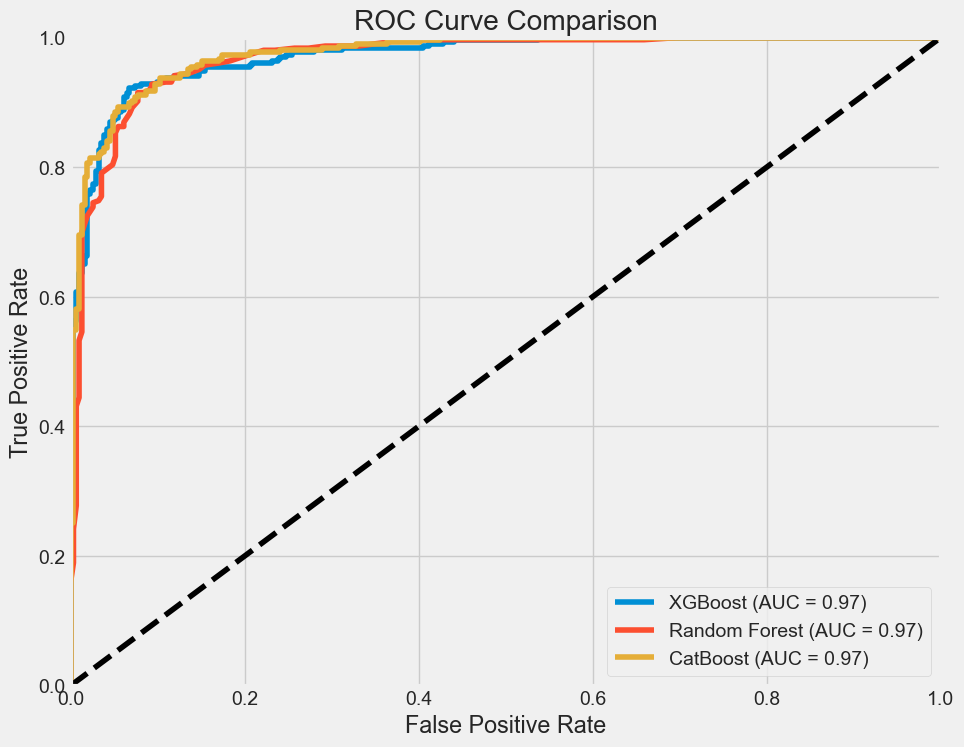

In [21]:
# Plot ROC curves for all classifiers on a single graph
plt.figure(figsize=(10, 8))

for clf_name, clf_results in results.items():
    fpr = clf_results['ROC_Curve']['FPR']
    tpr = clf_results['ROC_Curve']['TPR']
    roc_auc = clf_results['ROC_Curve']['AUC']
    plt.plot(fpr, tpr, label=f'{clf_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], "k--")
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">Conclusion</h2>
</div>

In conclusion, we embarked on a comprehensive analysis of the IBM HR Analytics Attrition Dataset, from data loading to model evaluation. By implementing and evaluating various machine learning algorithms to the original dataset and repeating it after performing SMOTE on the datast, we gained insights into which models are effective for predicting employee attrition.
Here, XGBoost classifier has produced best results.To further improve its performance, we can perform hyperparameter tuning.